In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import  train_test_split

In [2]:
wine=load_wine()

In [3]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
features=pd.DataFrame(wine.data,columns=wine.feature_names)
target=pd.DataFrame(wine.target,columns=['target'])

In [6]:
df=pd.concat([features,target],axis=1)

In [7]:
correlation=df.corr('pearson')

In [8]:
correlation['target'].sort_values()

flavanoids                     -0.847498
od280/od315_of_diluted_wines   -0.788230
total_phenols                  -0.719163
proline                        -0.633717
hue                            -0.617369
proanthocyanins                -0.499130
alcohol                        -0.328222
magnesium                      -0.209179
ash                            -0.049643
color_intensity                 0.265668
malic_acid                      0.437776
nonflavanoid_phenols            0.489109
alcalinity_of_ash               0.517859
target                          1.000000
Name: target, dtype: float64

In [9]:
X=df['flavanoids']#presently considering only one feature impacting the target
Z=df['od280/od315_of_diluted_wines']
Y=df['target']

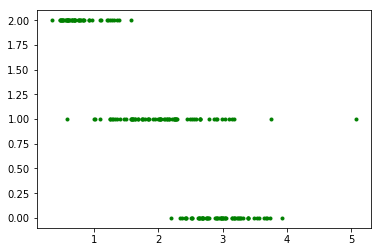

In [10]:
plt.plot(X,Y,'g.')

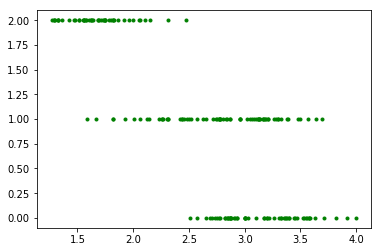

In [11]:
plt.plot(Z,Y,'g.')

In [15]:
x=np.array(X)
y=np.array(Y)
z=np.array(Z)
x=(x-x.min())/(x.max()-x.min())#didn't need to normalize y for its range is already 0 to 1
z=(z-z.min())/(z.max()-z.min())
y=(y-y.min())/(y.max()-y.min())

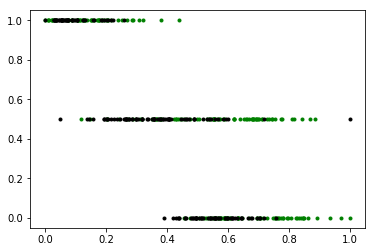

In [16]:
plt.plot(z,y,'g.',
         x,y,'k.')

In [17]:
x_train,x_test,z_train,z_test,y_train,y_test=train_test_split(x,z,y,test_size=0.25)

In [18]:
def hypothesis(a,b,c,x,z):
    return(1/(1+np.exp(-(a*x+b*z+c))))

In [19]:
def error(a,b,c,x,z,y):
    e=0
    m=len(x)
    for i in range(m):
        e+=-(y[i]*np.log(hypothesis(a,b,c,x[i],z[i])))-((1-y[i])*np.log(1-hypothesis(a,b,c,x[i],z[i])))
    return (1/m)*e

In [20]:
def step_gradient(a,b,c,x,z,y,learning_rate):
    grad_a=0
    grad_b=0
    grad_c=0
    m=len(x)
    for i in range(m):
        grad_a+=(hypothesis(a,b,c,x[i],z[i])-y[i])*x[i]
        grad_b+=(hypothesis(a,b,c,x[i],z[i])-y[i])*z[i]
        grad_c+=(hypothesis(a,b,c,x[i],z[i])-y[i])
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    c=c-(grad_c*learning_rate)
    return a,b,c

In [21]:
def descend(init_a,init_b,init_c,x,z,y,learning_rate,iterations):
    a=init_a
    b=init_b
    c=init_c
    for i in range(iterations):
        e=error(a,b,c,x,z,y)
        if i%1000==0:
            print(f"error: {e}, a:{a}, b:{b}, c:{c}")
        a,b,c=step_gradient(a,b,c,x,z,y,learning_rate)
    return a,b,c

In [22]:
init_a=0
init_b=0
init_c=0
iterations=10000
learning_rate=0.01

In [23]:
final_a,final_b,final_c=descend(init_a,init_b,init_c,x_train,z_train,y_train,learning_rate,iterations)

error: 0.6931471805599462, a:0, b:0, c:0
error: 0.4174669304852515, a:-5.770600505016922, b:-3.166515383051874, c:3.5752045853814702
error: 0.4173243597689907, a:-6.087581859984822, b:-2.9421823093686377, c:3.5724931001796993
error: 0.41732045415786584, a:-6.140345263324488, b:-2.905247528506851, c:3.572218099071842
error: 0.4173203446195126, a:-6.149192976921164, b:-2.899071791326921, c:3.572180477892265
error: 0.4173203415351353, a:-6.150677973438806, b:-2.8980357566057044, c:3.572174402422802
error: 0.41732034144822744, a:-6.15092725296517, b:-2.897861856254487, c:3.572173389283007
error: 0.4173203414457783, a:-6.150969099453509, b:-2.897832664043561, c:3.5721732193968565
error: 0.4173203414457094, a:-6.150976124242981, b:-2.8978277635446643, c:3.5721731908833263
error: 0.41732034144570745, a:-6.150977303498515, b:-2.897826940895347, c:3.5721731860968915


In [24]:
final_a,final_b,final_c

(-6.150977501460864, -2.8978268027967156, 3.572173185293397)

In [25]:
error(final_a,final_b,final_c,x_test,z_test,y_test)

0.44538922628279853

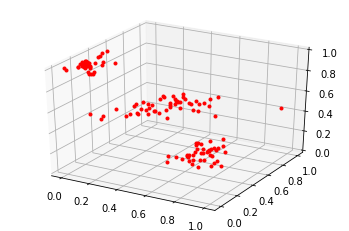

In [26]:
#plt.plot(x_train,y_train,'r.',
#     x_train,hypothesis(final_a,x_train,final_b),'g.')
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x_train,z_train,y_train, 'r.')

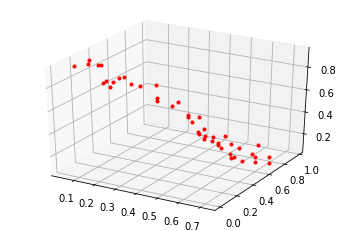

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x_test,z_test,hypothesis(final_a,final_b,final_c,x_test,z_test), 'r.')

In [28]:
def accuracy(a,b,c,x,z,y):
    correct=0
    m=len(x)
    for i in range(m):
        pred=hypothesis(a,b,c,x[i],z[i])
        if pred>0.5:
            zz=1
        else:
            zz=0
        if y[i]==zz:
            correct+=1
    print(f"Accuracy: {correct/len(y)}")

In [29]:
accuracy(final_a,final_b,final_c,x_train,z_train,y_train)

Accuracy: 0.6165413533834586


In [30]:
accuracy(final_a,final_b,final_c,x_test,y_test,z_test)

Accuracy: 0.0
